
# Citi Bike Data Analysis



## 1. Data Loading and Initial Exploration



In [9]:

import pandas as pd

# Load the dataset
file_path = 'Resources/combined_2023-citibike-tripdata.csv'
raw_df = pd.read_csv(file_path)

# Display basic information and the first few rows to understand the structure of the data
raw_df.info()
raw_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             40000 non-null  object 
 1   rideable_type       40000 non-null  object 
 2   started_at          40000 non-null  object 
 3   ended_at            40000 non-null  object 
 4   start_station_name  39981 non-null  object 
 5   start_station_id    39981 non-null  object 
 6   end_station_name    39900 non-null  object 
 7   end_station_id      39900 non-null  object 
 8   start_lat           40000 non-null  float64
 9   start_lng           40000 non-null  float64
 10  end_lat             39966 non-null  float64
 11  end_lng             39966 non-null  float64
 12  member_casual       40000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.0+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BA74F15CE6C69A2C,electric_bike,2023-01-26 10:51:33.103,2023-01-26 11:02:47.467,Madison Ave & E 82 St,7188.13,E 65 St & 2 Ave,6860.12,40.777903,-73.960799,40.764719,-73.962221,member
1,0E7E44403358BDA0,electric_bike,2023-01-25 09:10:50.573,2023-01-25 09:14:25.231,Church St & Worth St,5359.13,Greenwich St & Rector St,5073.07,40.716904,-74.006770,40.708066,-74.013560,member
2,F6EE4E214570A3B8,classic_bike,2023-01-26 19:05:08.637,2023-01-26 19:52:29.691,W 34 St & 11 Ave,6578.01,W 37 St & 10 Ave,6611.02,40.755942,-74.002116,40.756604,-73.997901,member
3,6143810935B90972,classic_bike,2023-01-10 18:11:11.884,2023-01-10 18:27:27.622,W 37 St & 10 Ave,6611.02,E 9 St & 5 Ave,5872.10,40.756604,-73.997901,40.732759,-73.995817,member
4,5ADEAA345A437F57,classic_bike,2023-01-25 18:09:09.276,2023-01-25 18:14:14.048,11 Ave & W 27 St,6425.04,8 Ave & W 31 St,6450.05,40.751396,-74.005226,40.750585,-73.994685,member



## 2. Data Cleaning

Since the missing rows are less than 1% of the total data (for example end_station 100 rows), we can drop them without affecting the analysis. 

In [19]:
# Clean the data by dropping rows with missing values in key columns
data_cleaned_df = raw_df.dropna()
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39895 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             39895 non-null  object 
 1   rideable_type       39895 non-null  object 
 2   started_at          39895 non-null  object 
 3   ended_at            39895 non-null  object 
 4   start_station_name  39895 non-null  object 
 5   start_station_id    39895 non-null  object 
 6   end_station_name    39895 non-null  object 
 7   end_station_id      39895 non-null  object 
 8   start_lat           39895 non-null  float64
 9   start_lng           39895 non-null  float64
 10  end_lat             39895 non-null  float64
 11  end_lng             39895 non-null  float64
 12  member_casual       39895 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.3+ MB


In [20]:
# Convert start_time and end_time columns to datetime format
data_cleaned_df['started_at'] = pd.to_datetime(data_cleaned_df['started_at'])
data_cleaned_df['ended_at'] = pd.to_datetime(data_cleaned_df['ended_at'])
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39895 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             39895 non-null  object        
 1   rideable_type       39895 non-null  object        
 2   started_at          39895 non-null  datetime64[ns]
 3   ended_at            39895 non-null  datetime64[ns]
 4   start_station_name  39895 non-null  object        
 5   start_station_id    39895 non-null  object        
 6   end_station_name    39895 non-null  object        
 7   end_station_id      39895 non-null  object        
 8   start_lat           39895 non-null  float64       
 9   start_lng           39895 non-null  float64       
 10  end_lat             39895 non-null  float64       
 11  end_lng             39895 non-null  float64       
 12  member_casual       39895 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory 

C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\1065643632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['started_at'] = pd.to_datetime(data_cleaned_df['started_at'])
C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\1065643632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['ended_at'] = pd.to_datetime(data_cleaned_df['ended_at'])


In [21]:
# Create a new column for trip duration
data_cleaned_df['trip_duration'] = (data_cleaned_df['ended_at'] - data_cleaned_df['started_at']).dt.total_seconds() / 60  # Convert duration to minutes

# Run a descriptive statistics on the cleaned data
data_cleaned_df.describe(include='all')

C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\1484190185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['trip_duration'] = (data_cleaned_df['ended_at'] - data_cleaned_df['started_at']).dt.total_seconds() / 60  # Convert duration to minutes


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
count,39895,39895,39895,39895,39895,39895,39895,39895,39895.000000,39895.000000,39895.000000,39895.000000,39895,39895.000000
unique,39895,2,NaN,NaN,2004,2040,1974,1993,NaN,NaN,NaN,NaN,2,NaN
top,BA74F15CE6C69A2C,electric_bike,NaN,NaN,W 21 St & 6 Ave,6140.05,Broadway & W 58 St,6948.10,NaN,NaN,NaN,NaN,member,NaN
freq,1,20066,NaN,NaN,167,167,185,173,NaN,NaN,NaN,NaN,32595,NaN
mean,NaN,NaN,2023-07-13 14:56:40.137887232,2023-07-13 15:10:28.306694144,NaN,NaN,NaN,NaN,40.739745,-73.972975,40.739629,-73.973012,NaN,13.802813
min,NaN,NaN,2023-01-01 00:33:23.597000,2023-01-01 00:37:02.214000,NaN,NaN,NaN,NaN,40.633394,-74.026823,40.633385,-74.043845,NaN,1.004850
25%,NaN,NaN,2023-04-30 12:22:46.929499904,2023-04-30 12:31:00.508000256,NaN,NaN,NaN,NaN,40.714948,-73.992805,40.714852,-73.992530,NaN,5.288575
50%,NaN,NaN,2023-07-17 12:28:01.030000128,2023-07-17 12:47:11.649999872,NaN,NaN,NaN,NaN,40.738988,-73.980472,40.738661,-73.980472,NaN,9.308950
75%,NaN,NaN,2023-09-30 19:46:29.616999936,2023-09-30 19:56:16.731000064,NaN,NaN,NaN,NaN,40.763026,-73.956272,40.763154,-73.956461,NaN,16.329675
max,NaN,NaN,2023-12-31 23:25:00.701000,2023-12-31 23:29:47.051000,NaN,NaN,NaN,NaN,40.886096,-73.853000,40.882260,-73.852720,NaN,1485.100600



## 3. Insight Generation and Visualization

### Membership Type

In [24]:
data_cleaned_df.member_casual.unique()

array(['member', 'casual'], dtype=object)

c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: Fut

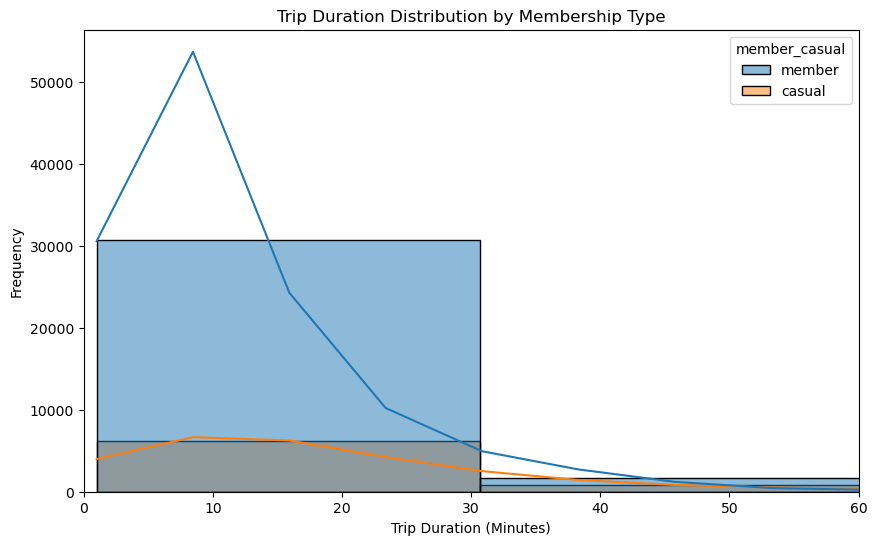

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

# Trip Duration by Membership Type
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned_df, x='trip_duration', hue='member_casual', bins=50, kde=True)
plt.title('Trip Duration Distribution by Membership Type')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)
plt.show()



### Peak Usage Times

C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\3404996398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['start_hour'] = data_cleaned_df['started_at'].dt.hour
C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\3404996398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['start_day'] = data_cleaned_df['started_at'].dt.day_name()
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

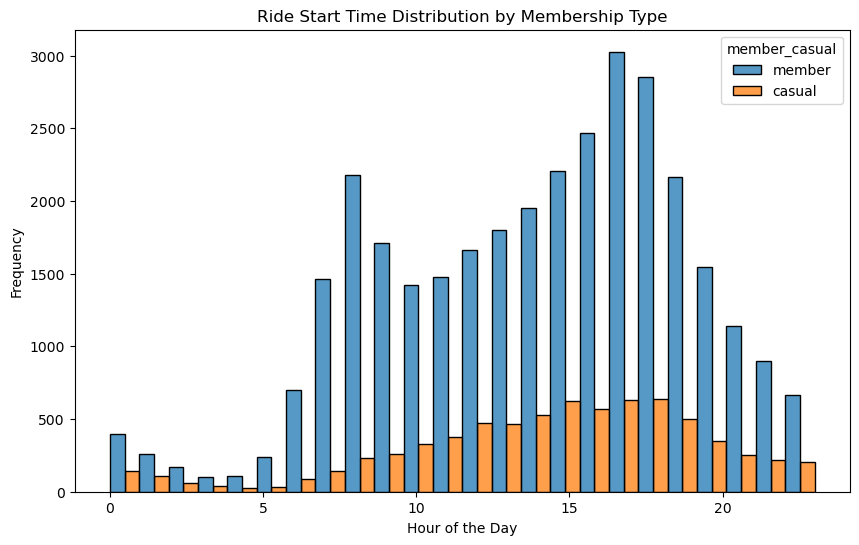

In [26]:

# Adding hour and day of week features for further analysis
data_cleaned_df['start_hour'] = data_cleaned_df['started_at'].dt.hour
data_cleaned_df['start_day'] = data_cleaned_df['started_at'].dt.day_name()

# Ride Start Time by Membership Type
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned_df, x='start_hour', hue='member_casual', multiple='dodge', bins=24)
plt.title('Ride Start Time Distribution by Membership Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


### Station Popularity

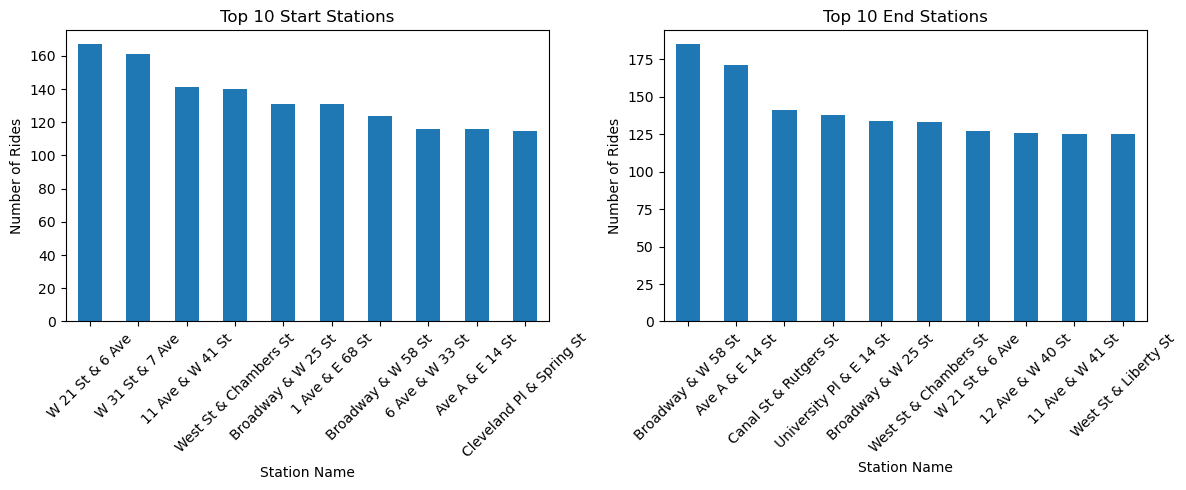

In [27]:

# Top 10 Start and End Stations
top_start_stations = data_cleaned_df['start_station_name'].value_counts().head(10)
top_end_stations = data_cleaned_df['end_station_name'].value_counts().head(10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_start_stations.plot(kind='bar')
plt.title('Top 10 Start Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_end_stations.plot(kind='bar')
plt.title('Top 10 End Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



### Trip Distance vs. Duration

C:\Users\carlo\AppData\Local\Temp\ipykernel_35236\1857072827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_df['trip_distance'] = haversine(data_cleaned_df['start_lat'], data_cleaned_df['start_lng'],


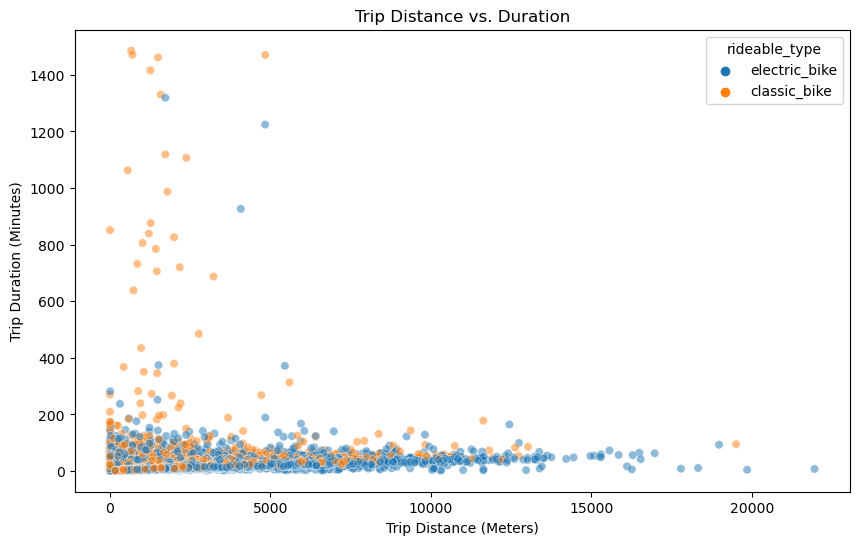

In [28]:

# Function to calculate distance between two points using Haversine formula
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c * 1000  # Convert to meters

# Calculate trip distance
data_cleaned_df['trip_distance'] = haversine(data_cleaned_df['start_lat'], data_cleaned_df['start_lng'],
                                          data_cleaned_df['end_lat'], data_cleaned_df['end_lng'])

# Scatter plot of trip distance vs. duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned_df, x='trip_distance', y='trip_duration', hue='rideable_type', alpha=0.5)
plt.title('Trip Distance vs. Duration')
plt.xlabel('Trip Distance (Meters)')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


### Spatial Distribution of Trips

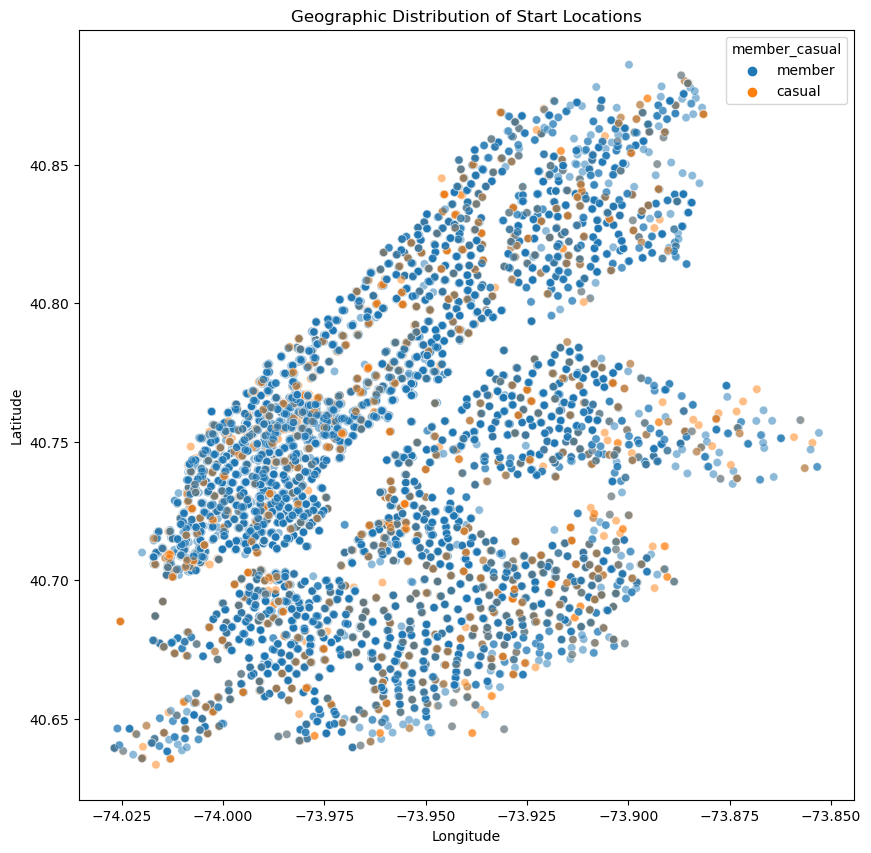

In [29]:

# Geographic Distribution of Start Locations
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_cleaned_df, x='start_lng', y='start_lat', hue='member_casual', alpha=0.5, legend='full')
plt.title('Geographic Distribution of Start Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## Conclusion

These insights provide a comprehensive understanding of Citi Bike usage patterns in 2023, highlighting key trends and areas for potential optimization.
